In [1]:
import glob
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
from river import anomaly
from river import stream
import math
from sklearn.metrics import roc_auc_score
from river.preprocessing import MinMaxScaler
from matplotlib.transforms import Affine2D
import seaborn as sns

In [2]:
# Get CSV files list from a folder
path = './paper_result/'
csv_files = glob.glob(path + "/*_d*_m*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
result = pd.concat(df_list, ignore_index=True)

In [3]:
result.loc[result['model_type']=='o', 'model_type']='rHST'
result.loc[result['model_type']=='l', 'model_type']='IRHST-Leaf Scoring'
result.loc[result['model_type']=='p', 'model_type']='IRHST-Path Scoring'
result

,seed,dimension,model_type,num_samples,m,sKL,auc
0,0,2,IRHST-Leaf Scoring,96,1.0,5.0,0.606695
1,0,2,IRHST-Leaf Scoring,128,1.0,5.0,0.628126
2,0,2,IRHST-Leaf Scoring,160,1.0,5.0,0.634100
3,0,2,IRHST-Leaf Scoring,192,1.0,5.0,0.650375
4,0,2,IRHST-Leaf Scoring,224,1.0,5.0,0.677238
...,...,...,...,...,...,...,...
17995,9,4,rHST,576,0.6,0.4,0.501440
17996,9,4,rHST,608,0.6,0.4,0.501440
17997,9,4,rHST,640,0.6,0.4,0.514588
17998,9,4,rHST,672,0.6,0.4,0.514588


In [4]:
for d in result.dimension.unique():
    for t in result.model_type.unique():
        for m in result.m.unique():
            assert(len(result[(result.dimension==d) & (result.model_type==t) & (result.m==m)]) == 200)

In [5]:
setting_combination_list = []
for d in np.sort(result.dimension.unique()):
    for m in np.sort(result.m.unique()):
        setting_combination_list.append((d, m))

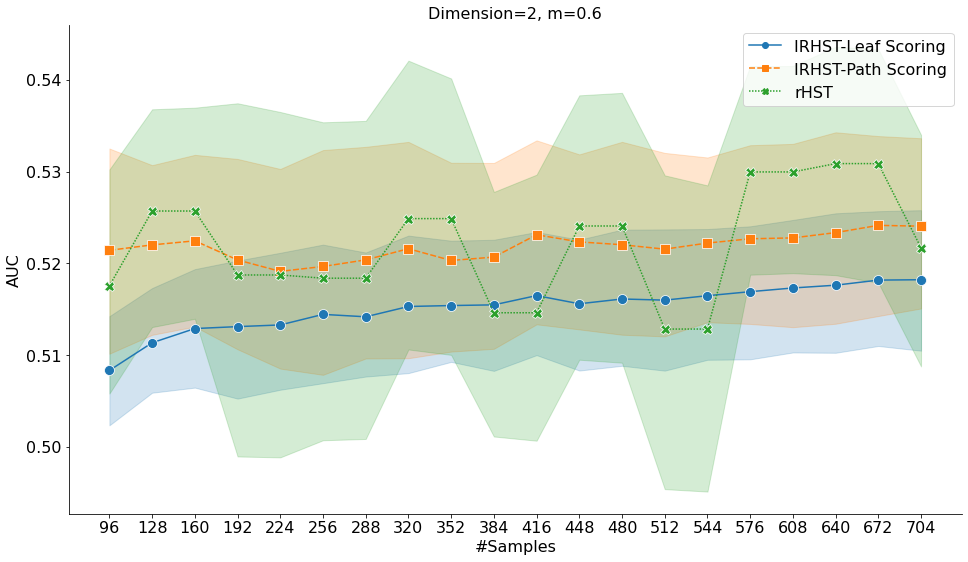

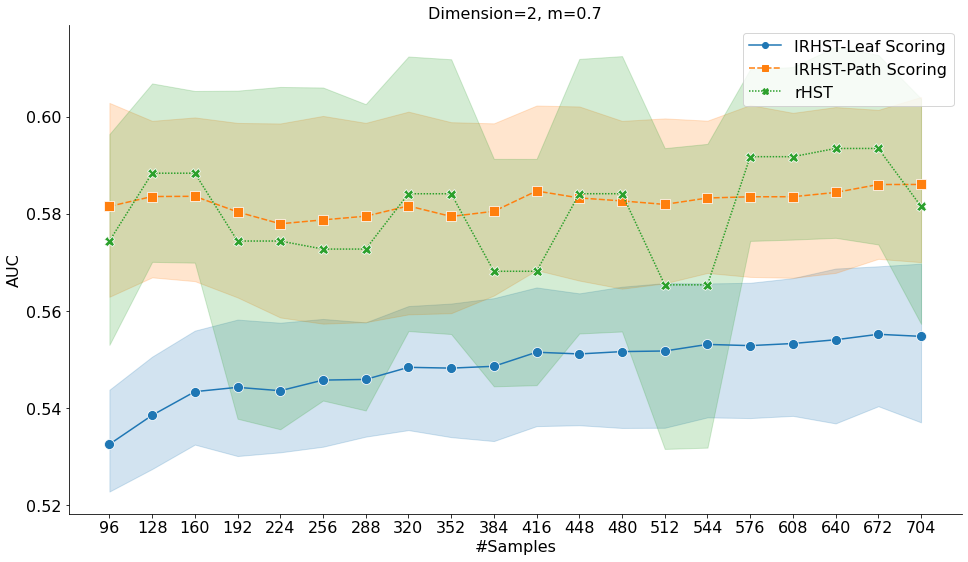

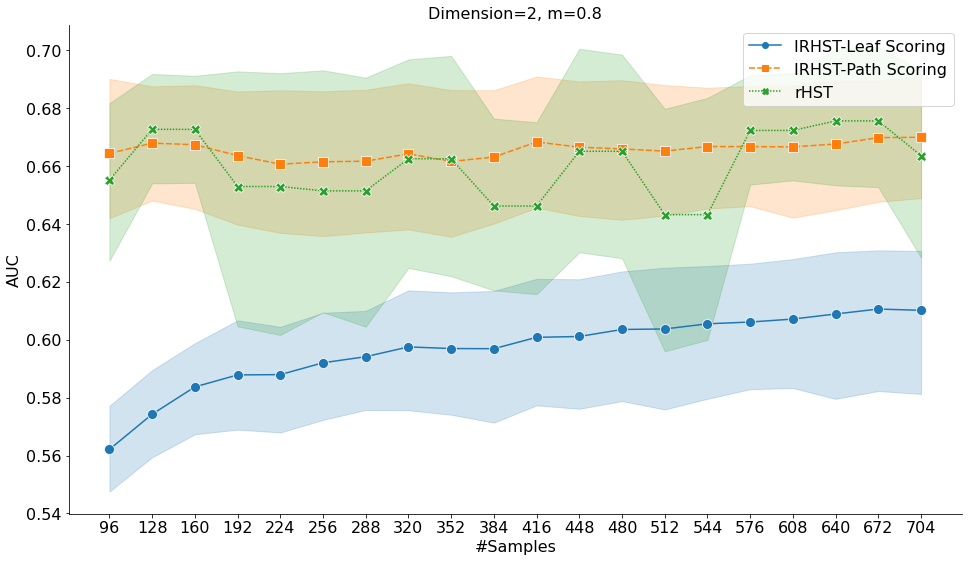

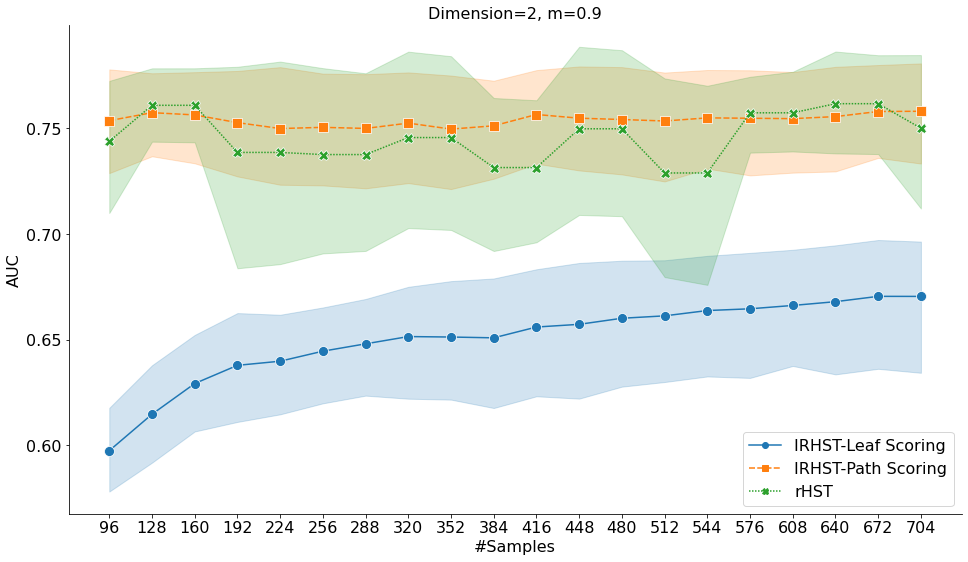

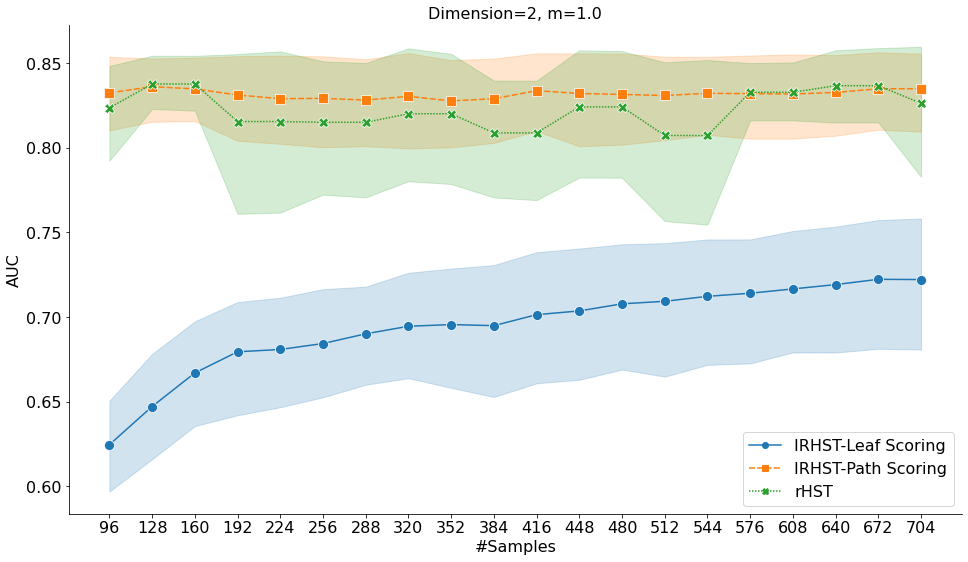

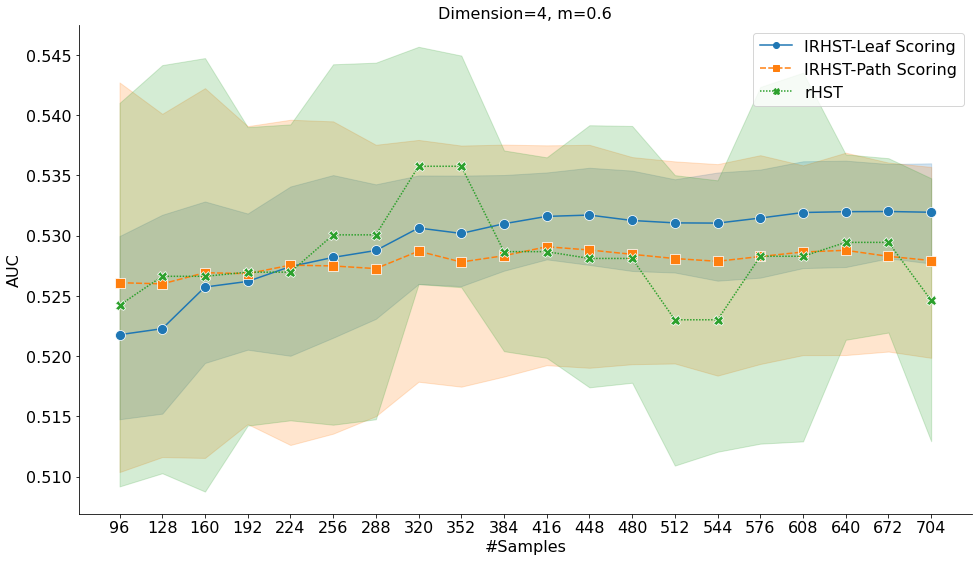

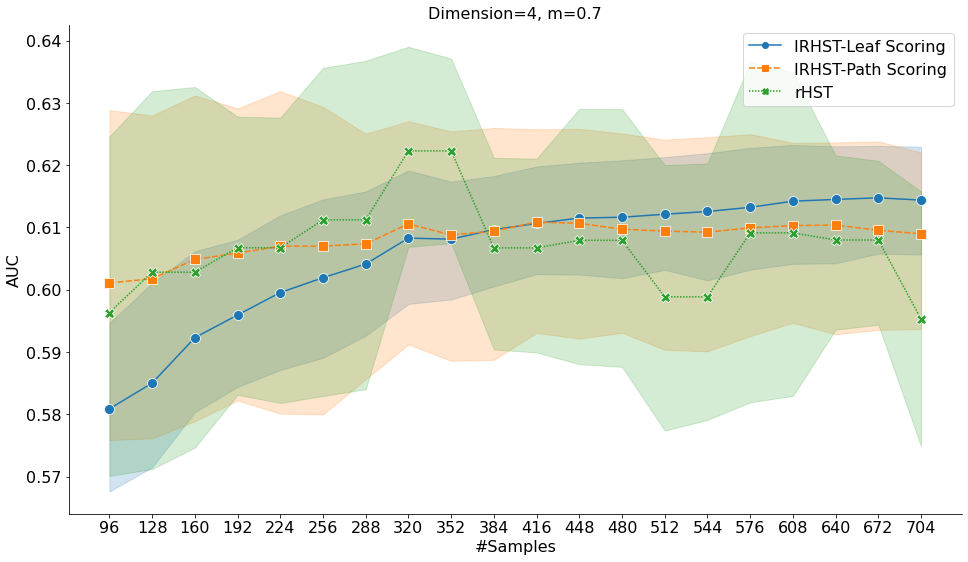

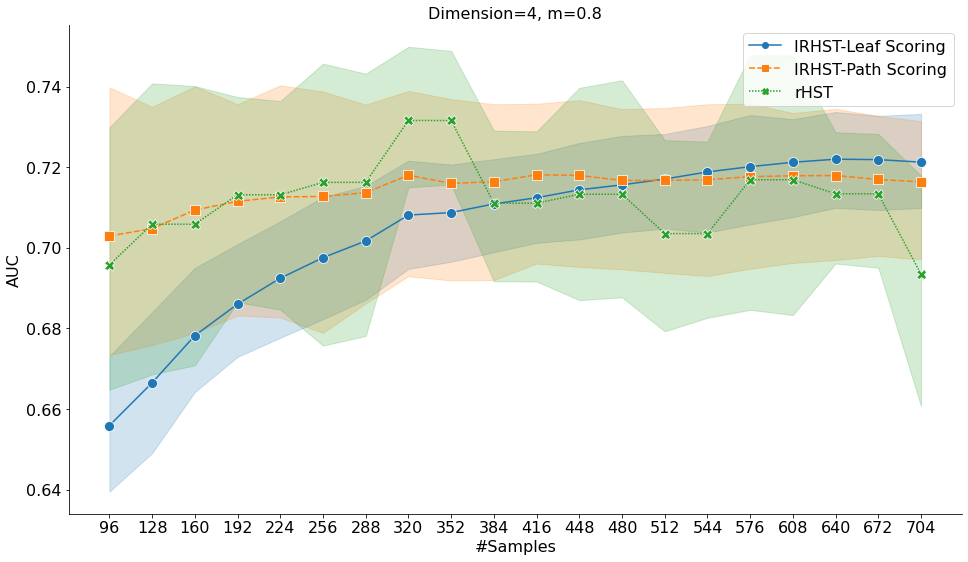

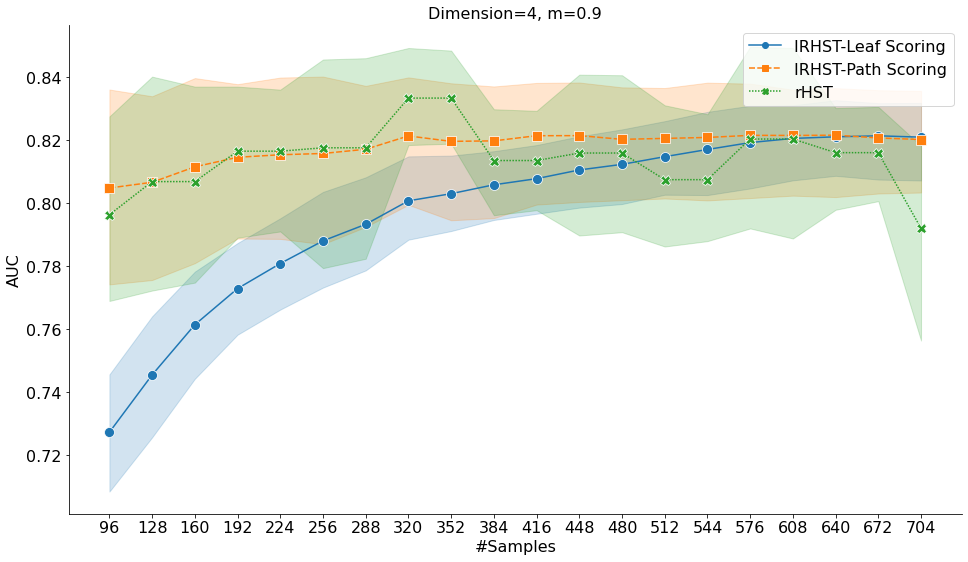

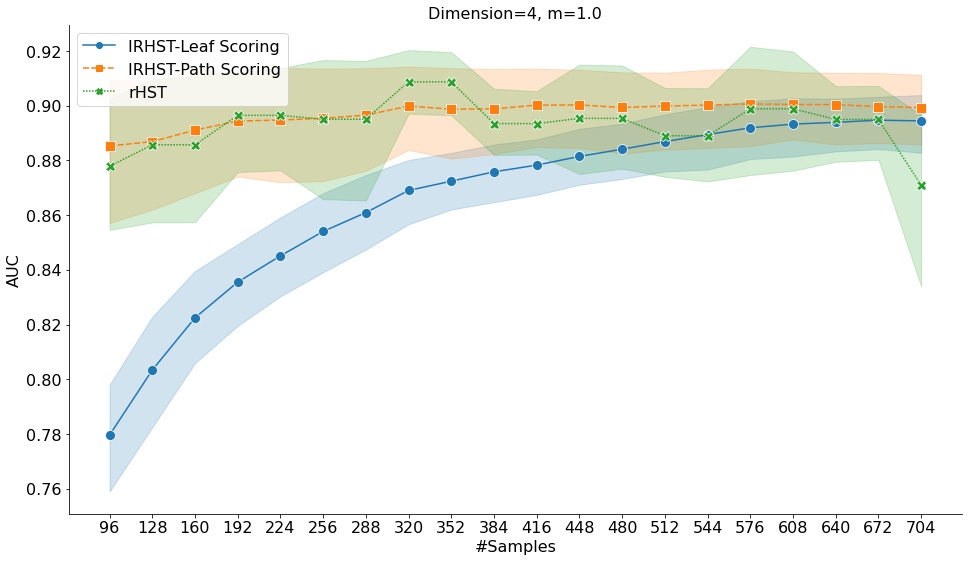

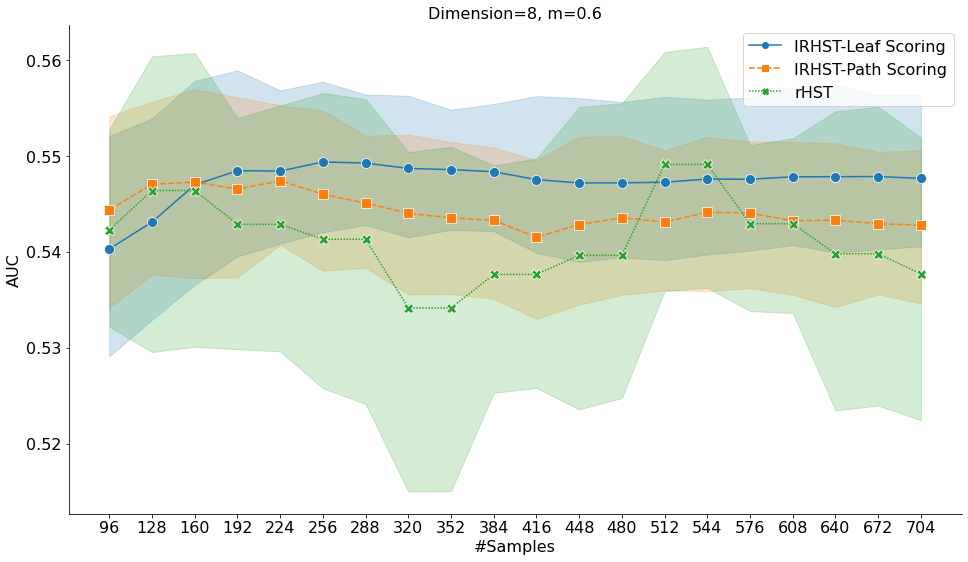

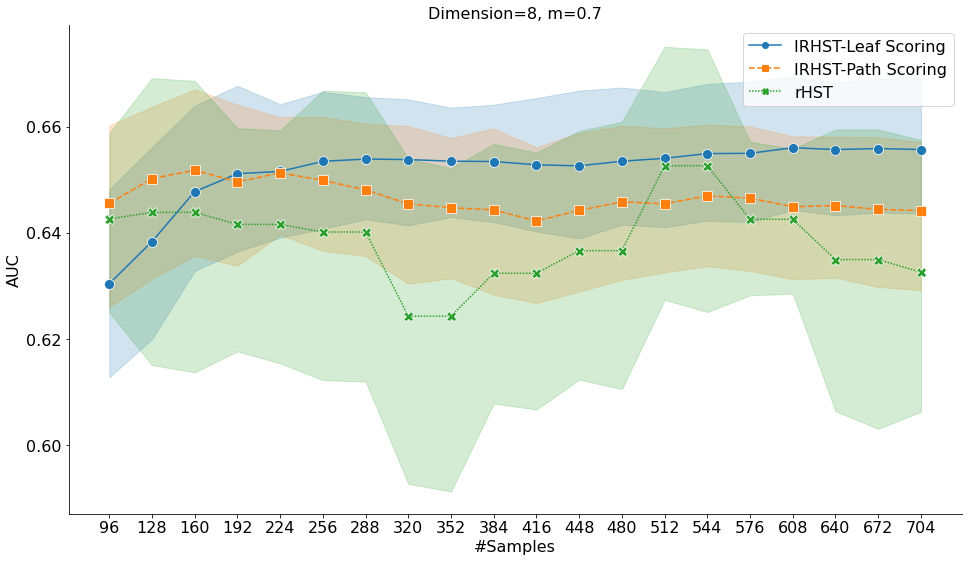

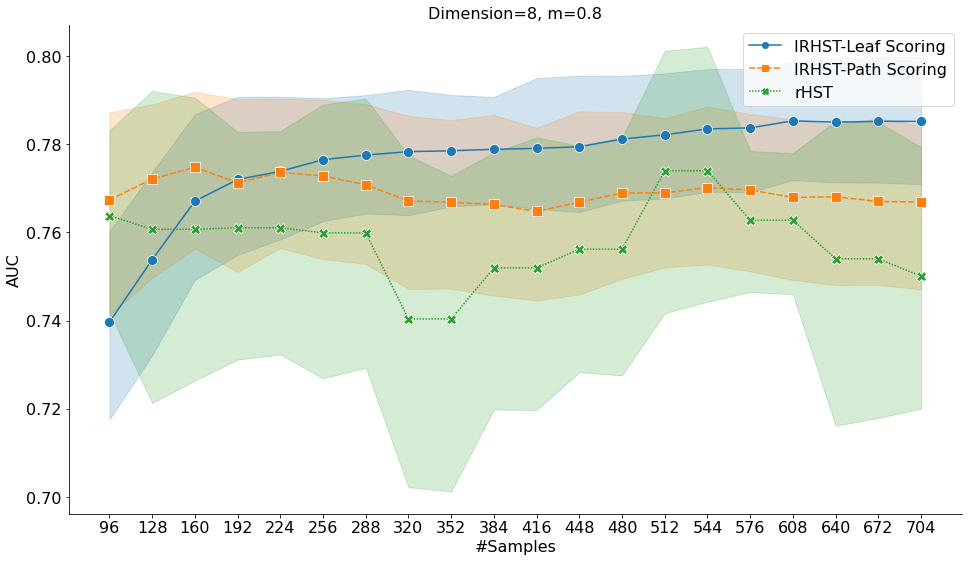

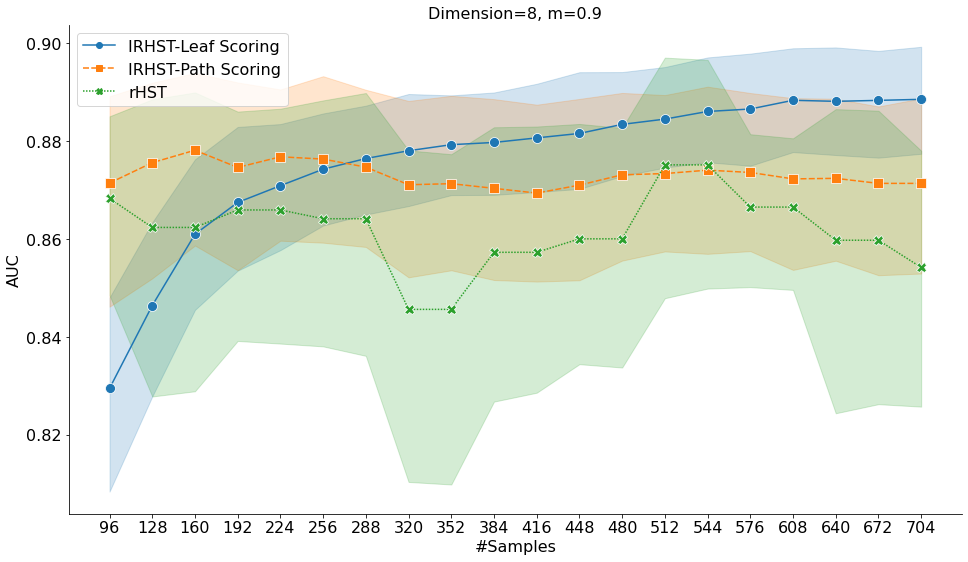

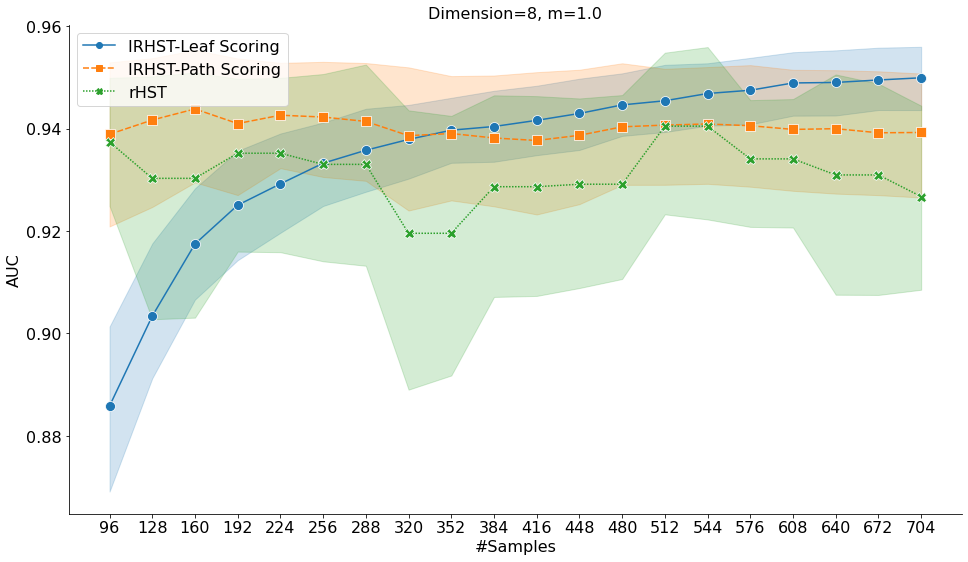

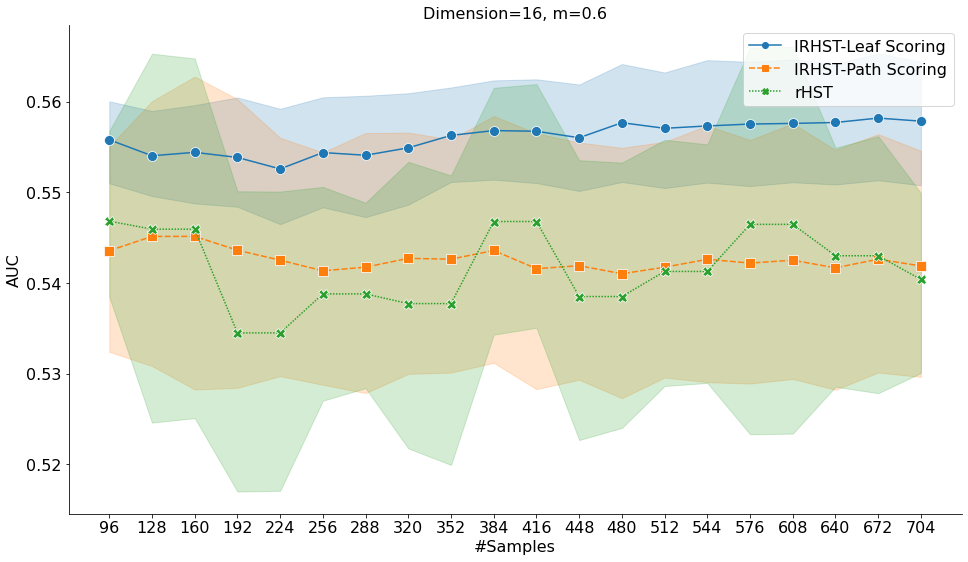

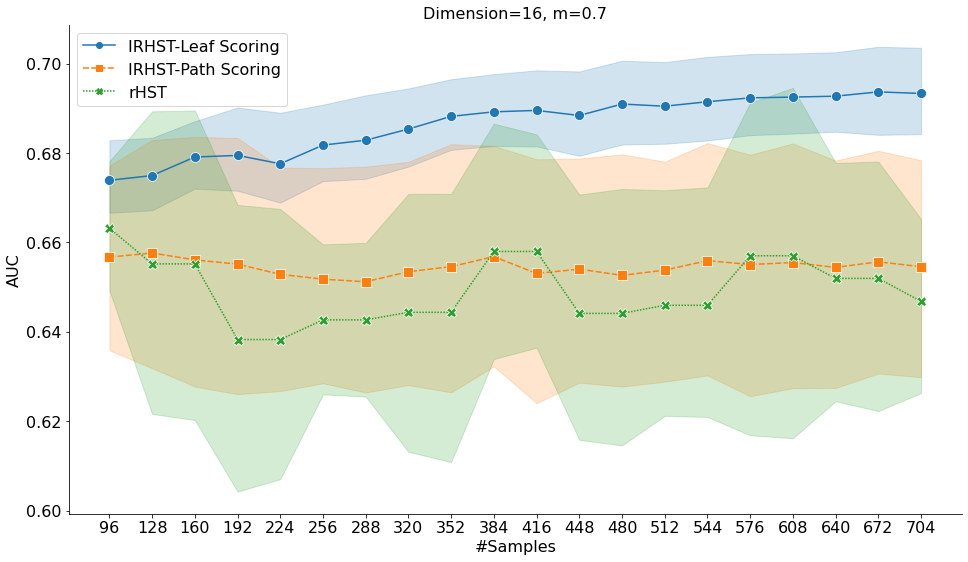

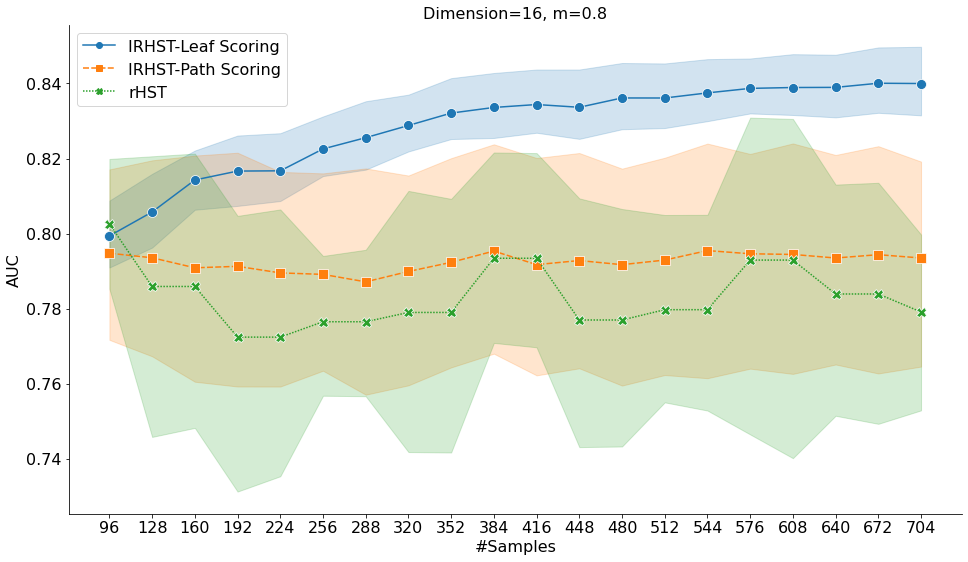

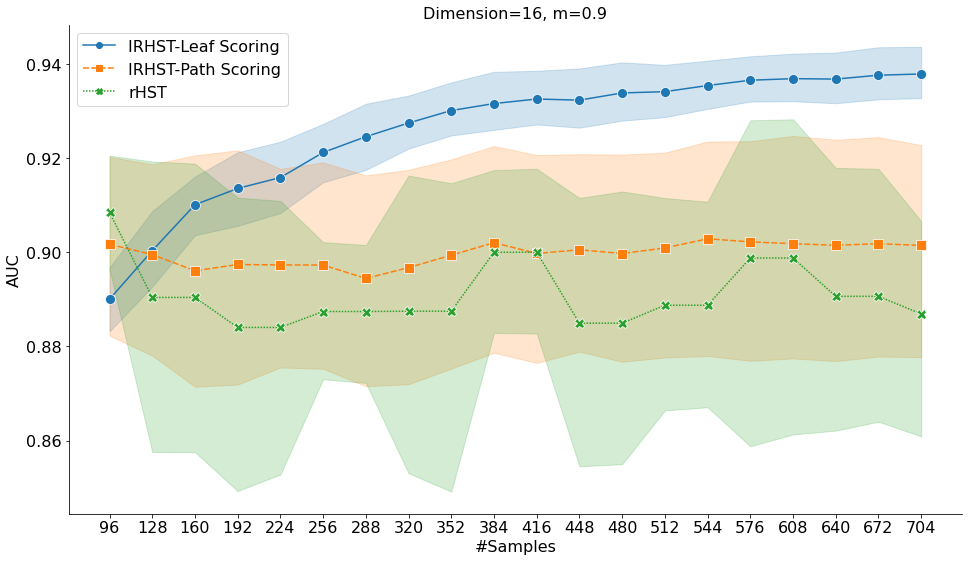

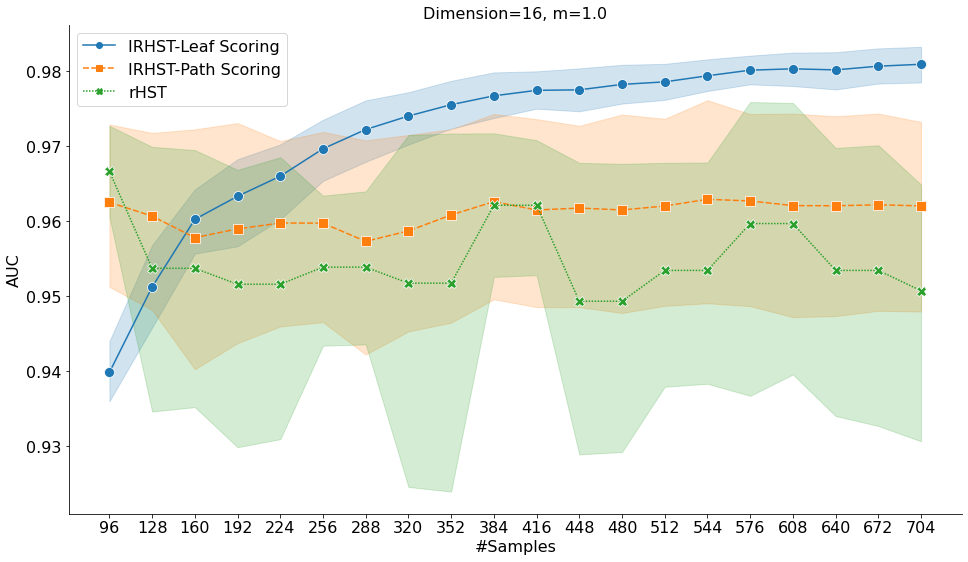

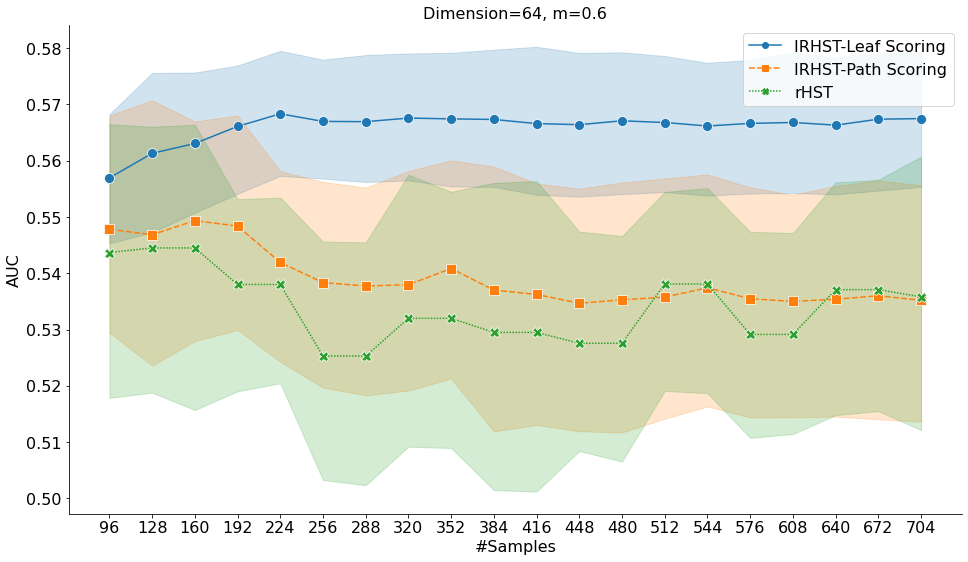

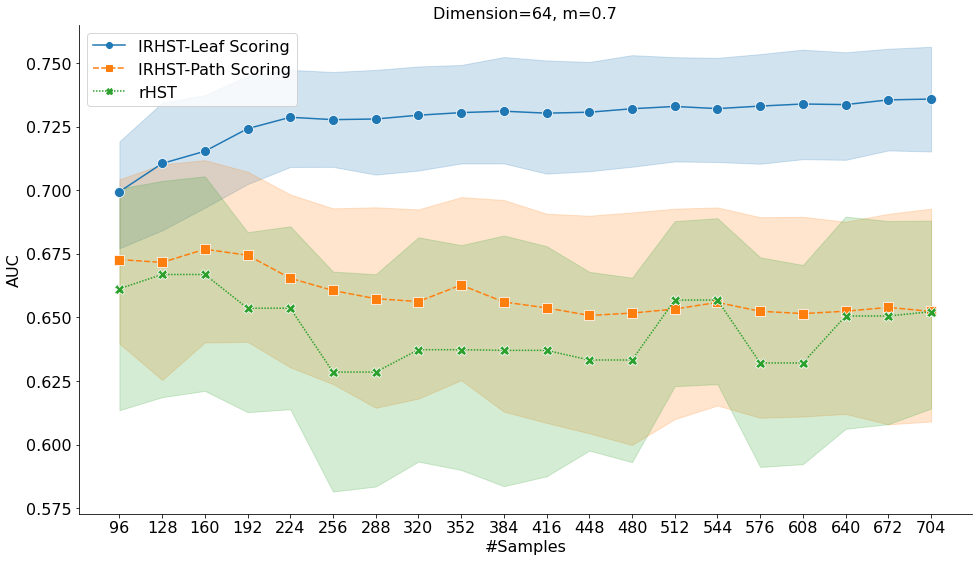

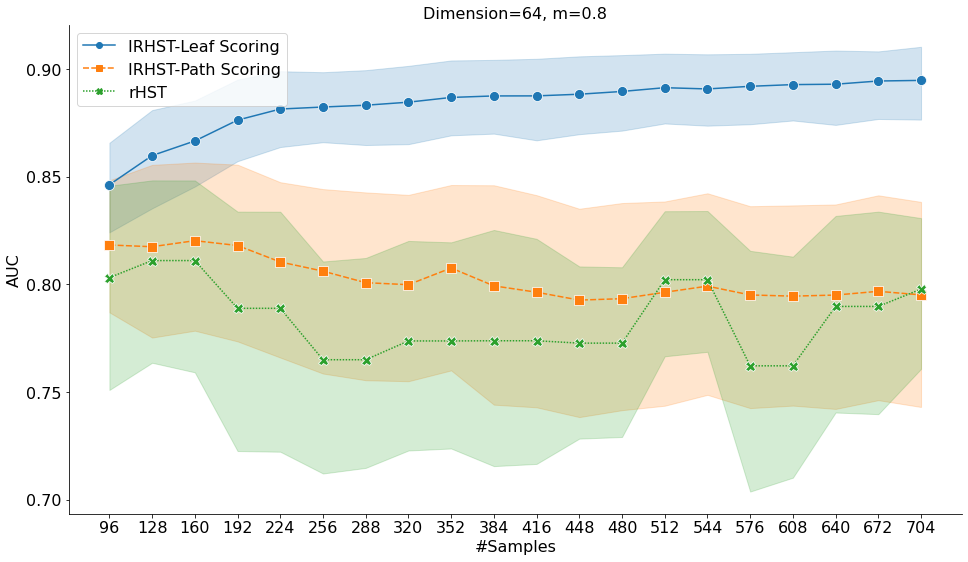

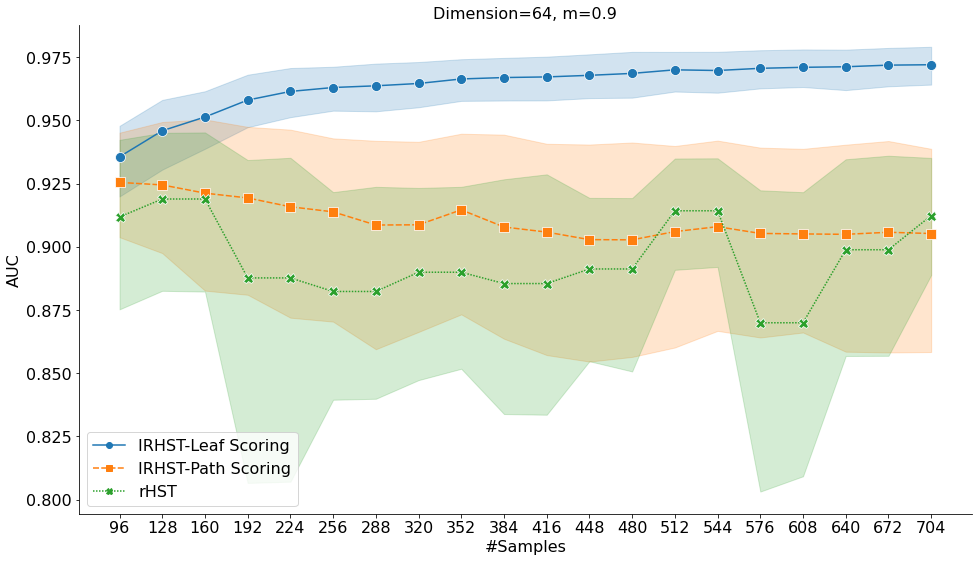

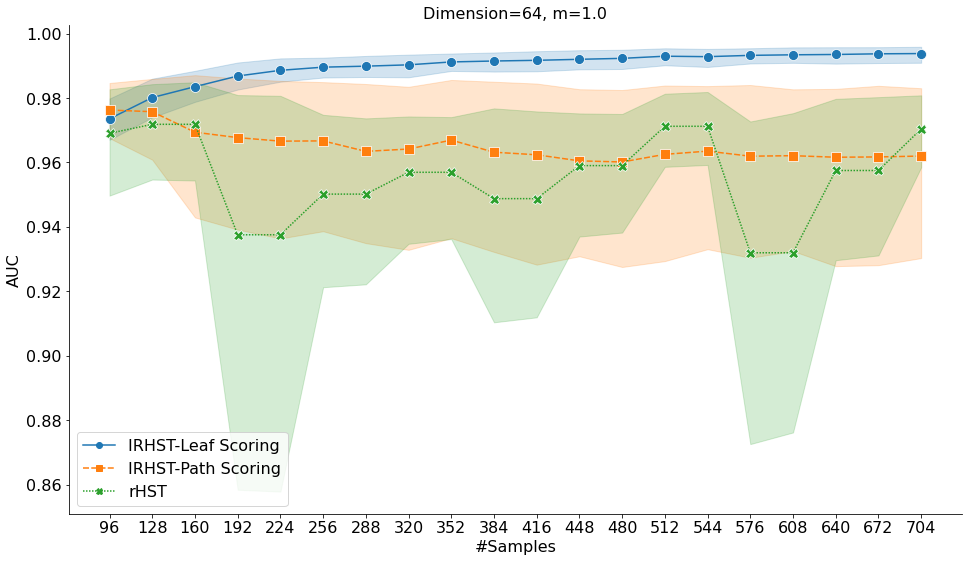

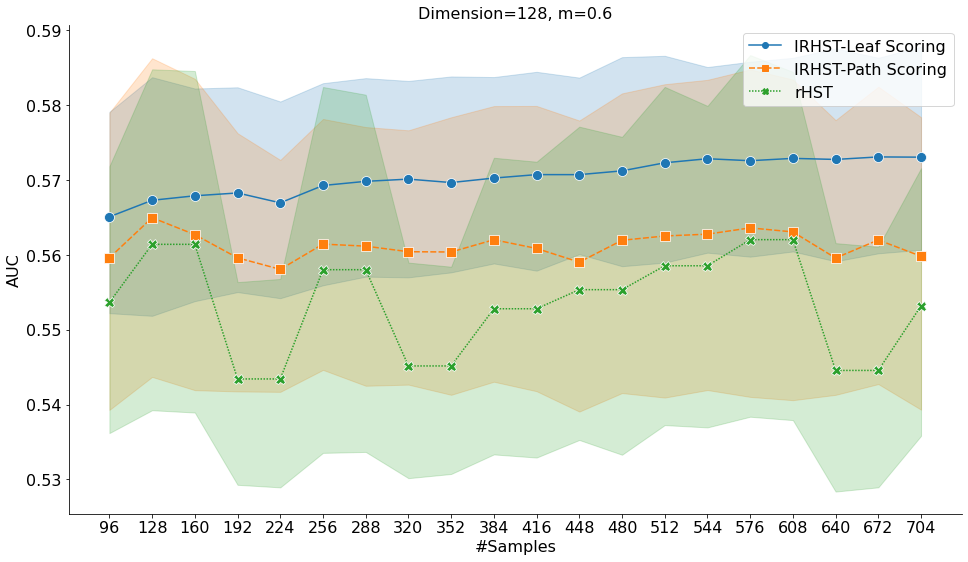

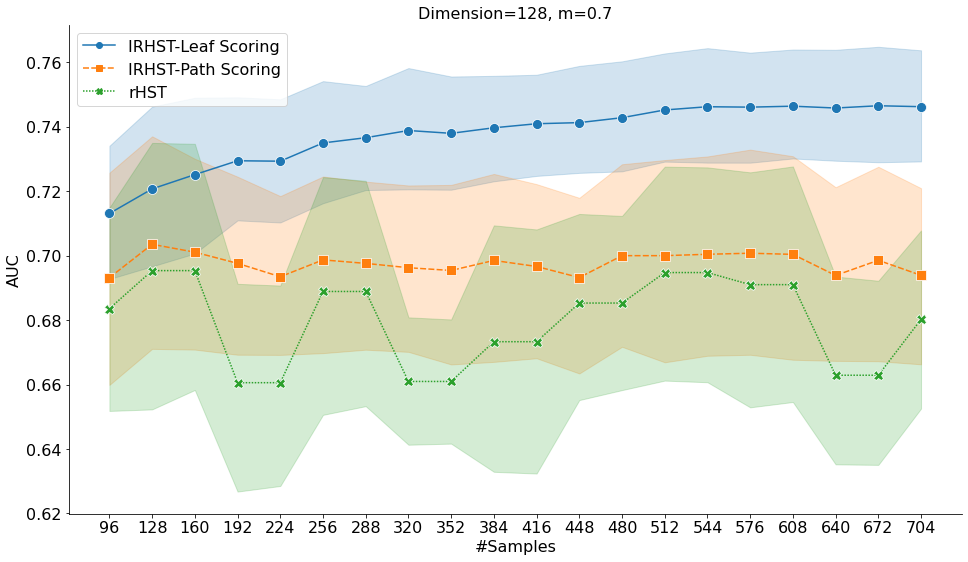

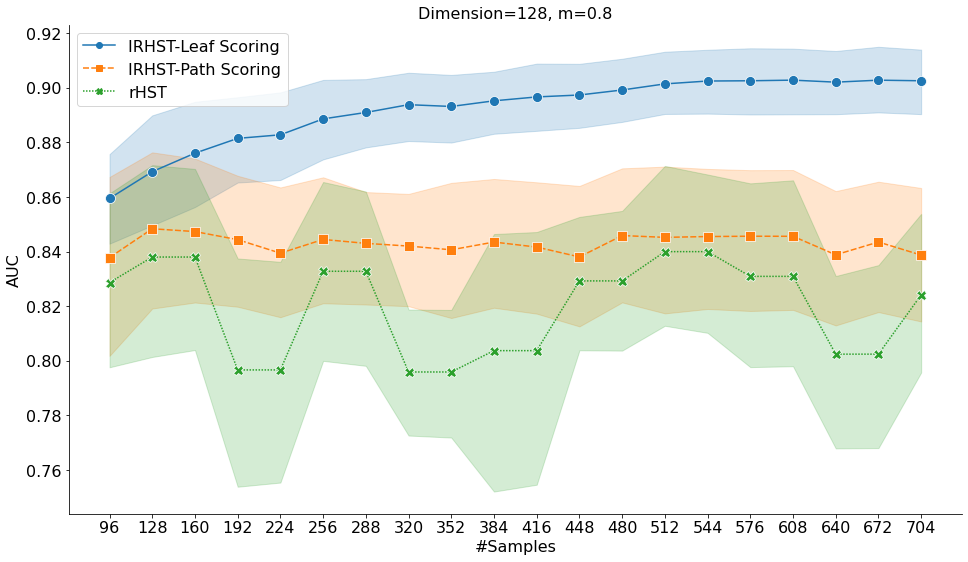

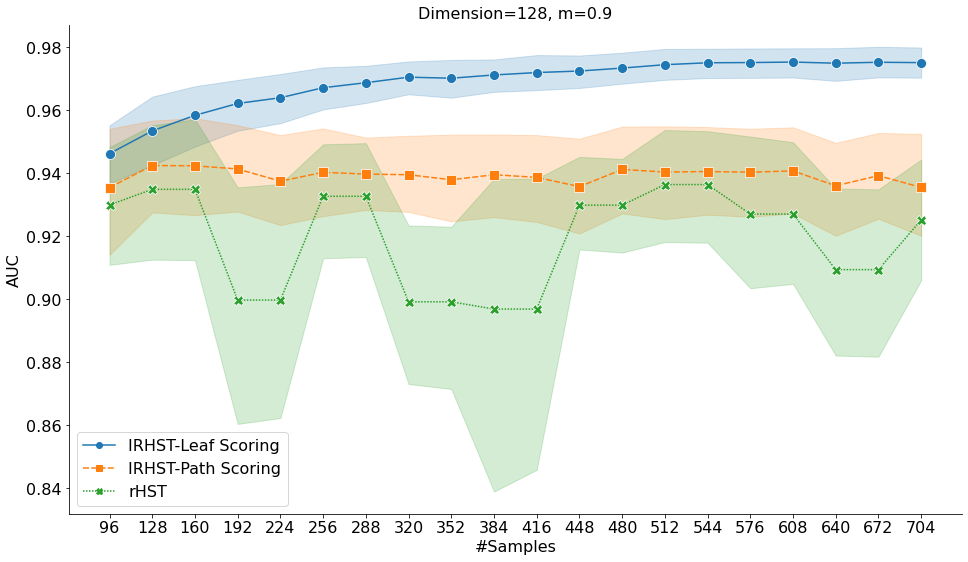

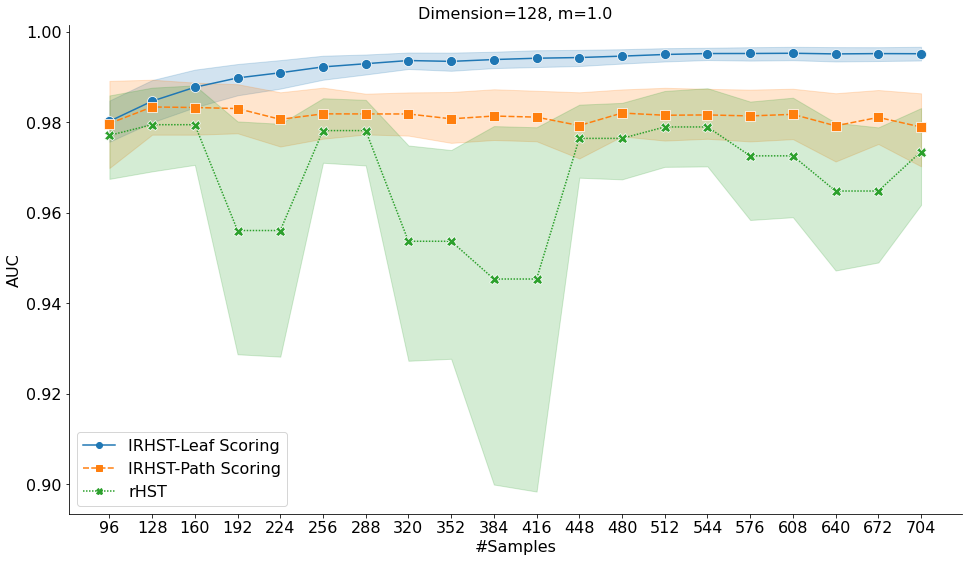

In [6]:
xticks = result.num_samples.unique()
order = ['IRHST-Leaf Scoring', 'IRHST-Path Scoring', 'rHST']
markers = {'IRHST-Leaf Scoring':'o', 'IRHST-Path Scoring':'s', 'rHST':'X'}

for d, m in setting_combination_list:
    fig, ax = plt.subplots(figsize=(16,9))
    sns.lineplot(data=result[(result.dimension==d) & (result.m==m)], x="num_samples", y="auc", hue='model_type', hue_order=order, style='model_type', style_order=order, markers=markers, markersize=10)
    ax.set_xticks(xticks) 
    sns.despine()
    ax.set_title(f"Dimension={d}, m={m}", fontsize=16)
    ax.tick_params(labelsize=16)
    ax.set_xlabel('#Samples', fontsize=16)
    ax.set_ylabel('AUC', fontsize=16)
    ax.legend(prop={'size': 16})
    plt.show()